In [2]:
import pandas as pd
import csv
import numpy as np
from keras.models import Sequential
import keras
from keras import layers
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
train= pd.read_csv("/content/drive/MyDrive/HW4/train.csv")
test= pd.read_csv("/content/drive/MyDrive/HW4/test.csv")

In [4]:
print(train.iloc[1])

time      1.000000
value    49.352749
Name: 1, dtype: float64


In [5]:
train = train[['value']]
train.shape

(1000, 1)

In [6]:
test = test[['value']]
x_test_to_show= test
test.shape

(461, 1)

In [7]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train=np.array(train).reshape(-1,1)
x_test=np.array(test).reshape(-1,1)
scaler.fit(x_train)

MinMaxScaler()

In [8]:
x_test.shape

(461, 1)

In [9]:
print(scaler.data_max_)
print(scaler.data_min_)

[97.26461792]
[-21.60377121]


In [10]:
scaler.fit(x_train)

MinMaxScaler()

In [11]:
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [12]:
length_of_sequence=20
x_train_temp=x_train.copy()
#-----------------------------------------------------------------------------------------------------
x_test_temp=np.append(x_train.copy()[-length_of_sequence:],x_test.copy())
#-----------------------------------------------------------------------------------------------------
x_train=[]
x_test=[]
y_train=[]
y_test=[]
for i in range(len(x_train_temp)-length_of_sequence):
    x_train.append(x_train_temp[i:i+length_of_sequence])
    y_train.append(x_train_temp[i+length_of_sequence])

for i in range(len(x_test_temp)-length_of_sequence):
    x_test.append(x_test_temp[i:i+length_of_sequence])
    y_test.append(x_test_temp[i+length_of_sequence])


In [13]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)


In [14]:
x_train.shape

(980, 20, 1)

In [15]:
y_train.shape

(980, 1)

In [16]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models


def build_model():
    model= tf.keras.Sequential([
                                layers.Input(shape=(20,1)),
                                tf.keras.layers.SimpleRNN(units=50,return_sequences=True),
                                tf.keras.layers.Dropout(rate=0.2),
                                tf.keras.layers.SimpleRNN(units=50,return_sequences=True),
                                tf.keras.layers.Dropout(rate=0.2),
                                tf.keras.layers.SimpleRNN(units=50,return_sequences=True),
                                tf.keras.layers.Dropout(rate=0.2),
                                tf.keras.layers.SimpleRNN(units=50,return_sequences=False),
                                tf.keras.layers.Dense(1, activation='relu')
                                ])
  
    return model

In [27]:
model=build_model()
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(x_train,y_train,batch_size=32, epochs=100)

Epoch 1/100
31/31 [==============================] - 5s 19ms/step - loss: 0.2327
Epoch 2/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0517
Epoch 3/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0221
Epoch 4/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0158
Epoch 5/100
31/31 [==============================] - 1s 19ms/step - loss: 0.0130
Epoch 6/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0116
Epoch 7/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0119
Epoch 8/100
31/31 [==============================] - 1s 20ms/step - loss: 0.0101
Epoch 9/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0093
Epoch 10/100
31/31 [==============================] - 1s 19ms/step - loss: 0.0087
Epoch 11/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0085
Epoch 12/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0096
Epoch 13/100
31/31 [=====

In [18]:
print(x_test.shape)

(461, 20)


In [19]:
print(x_test[i].shape)

(20,)


In [28]:
predictions_test=[]

for i in range(len(x_test)):
    input_of_model=np.expand_dims(x_test[i],axis=0)
    input_of_model=np.expand_dims(input_of_model,axis=2)
    pred=model.predict(input_of_model)
    predictions_test.append(pred[0,0])


In [29]:
x_test_to_show_vals = x_test_to_show['value'].values.tolist()
preds_to_show=scaler.inverse_transform([predictions_test])

In [30]:
test_preds_to_show=preds_to_show[0].T
test_preds_to_show = test_preds_to_show.tolist()

In [31]:
print(test_preds_to_show)

[66.2769127747516, 67.39623940915416, 68.27178872884635, 68.61377981216529, 67.6119384404281, 67.19578753053104, 67.36208918806821, 67.90877612976765, 67.95453175793632, 68.39942695143208, 68.16996864021023, 68.33301823312533, 68.21031124578354, 69.13914057845629, 68.743104290481, 68.86843276782317, 68.51555895844861, 68.59364393491919, 67.19916712709909, 66.73553890776282, 66.04803544239469, 66.58870004220138, 65.98579276765611, 65.90961368526689, 66.80893354266516, 68.68837891544618, 69.32013675021177, 69.129901597482, 68.57724899475468, 68.57683097337625, 67.97178399618203, 66.9878679479609, 65.53165150807796, 65.07587358852659, 65.35972427470213, 65.68641152450539, 66.360311582304, 66.57088808041506, 65.51548329137295, 65.12026179083021, 65.8947916391026, 67.2489258413494, 67.51908101355002, 67.61506297310422, 67.96314724939701, 68.30474156666185, 68.37172417872543, 68.57603035615992, 67.61446782402305, 67.41502911585954, 68.0052611319976, 68.47347341628046, 68.14516367672022, 68.2

In [32]:
print(test_preds_to_show)
print(x_test_to_show_vals)

[66.2769127747516, 67.39623940915416, 68.27178872884635, 68.61377981216529, 67.6119384404281, 67.19578753053104, 67.36208918806821, 67.90877612976765, 67.95453175793632, 68.39942695143208, 68.16996864021023, 68.33301823312533, 68.21031124578354, 69.13914057845629, 68.743104290481, 68.86843276782317, 68.51555895844861, 68.59364393491919, 67.19916712709909, 66.73553890776282, 66.04803544239469, 66.58870004220138, 65.98579276765611, 65.90961368526689, 66.80893354266516, 68.68837891544618, 69.32013675021177, 69.129901597482, 68.57724899475468, 68.57683097337625, 67.97178399618203, 66.9878679479609, 65.53165150807796, 65.07587358852659, 65.35972427470213, 65.68641152450539, 66.360311582304, 66.57088808041506, 65.51548329137295, 65.12026179083021, 65.8947916391026, 67.2489258413494, 67.51908101355002, 67.61506297310422, 67.96314724939701, 68.30474156666185, 68.37172417872543, 68.57603035615992, 67.61446782402305, 67.41502911585954, 68.0052611319976, 68.47347341628046, 68.14516367672022, 68.2

In [37]:
mean_absolute_error(x_test_to_show_vals, test_preds_to_show)

5.73820122435582

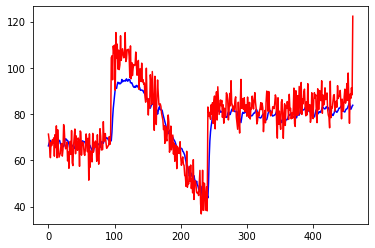

In [34]:
plt.plot(test_preds_to_show,'b',x_test_to_show_vals,'r')
plt.show()